In [1]:
import Auto_paint_self
import numpy as np

In [2]:
#打开nc文件
def open_data_nc(ncmode,filename,v_name,iftime,timename,timestart,timeend,iflon,lonname,iflat,latname,latlow,lattop,lonleft,lonright,latresolution,lonresolution,ifexper,iflevel,levelname,level,changeresolution=1,timespace=1,ifchange_west_east='no',ifinterpolate='no'):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from netCDF4 import Dataset as net
    import xarray as xr
    from datetime import datetime,timedelta
    from dateutil.relativedelta import relativedelta
    import os
    from wrf import getvar,interplevel
    
    plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文
    plt.rcParams['axes.unicode_minus']=False #正常显示正负号
    if ncmode == 'one':
        file = xr.open_dataset(filename)
        if ifinterpolate == 'yes':
            inter = str('file.interp('+latname+'=np.arange('+str(latlow)+','+str(lattop+latresolution)+','+str(latresolution)+'),'+lonname+'=np.arange('+str(lonleft)+','+str(lonright+lonresolution)+','+str(lonresolution)+'))')
            files=eval(inter)
            file = files
        if iftime  == 'yes' or iftime == 'self':
            times = np.array(file[timename])
        if iflon == 'yes':
            lon = np.array(file[lonname])
        if iflat == 'yes':
            lat = np.array(file[latname])
        v = file[v_name]
        if iflevel != 'no':
            levels = np.array(file[levelname])
    elif ncmode == 'more_time' or ncmode =='more_level':
        direc = os.listdir(filename)
        path = []
        file = []
        v = []
        lat = []
        lon = []
        times = []
        levels = []
        for i in range(len(direc)):
            if filename[-1] == '/':  
                path.append(filename+str(direc[i]))
            else:
                path.append(filename+'/'+str(direc[i]))
            file_xr = xr.open_dataset(path[i])
            if ifinterpolate == 'yes':
                inter = str('file_xr.interp('+latname+'=np.arange('+str(latlow)+','+str(lattop)+','+str(latresolution)+'),'+lonname+'=np.arange('+str(lonleft)+','+str(lonright)+','+str(lonresolution)+'))')
                files=eval(inter)
                file_xr = files
            file.append(file_xr)
            if ncmode == 'more_time':
                vs=np.array(file[i][v_name])
                if iftime =='yes':
                    timelist=np.array(file[i][timename])
                if i != 0:
                    if iftime =='yes':
                        v=np.concatenate((v,vs))
                        times=np.concatenate((times,timelist))
                    elif iftime =='create':
                        if iflevel !='no':
                            if iflat !='no':
                                if iflon !='no':
                                    vs = vs.reshape((1,vs.shape[0],vs.shape[1],vs.shape[2]))
                                else:
                                    vs = vs.reshape((1,vs.shape[0],vs.shape[1]))
                            else:
                                if iflon !='no':
                                    vs = vs.reshape((1,vs.shape[0],vs.shape[1]))
                                else:
                                    vs = vs.reshape((1,vs.shape[0]))
                        else:
                            if iflat !='no':
                                if iflon !='no':
                                    vs = vs.reshape((1,vs.shape[0],vs.shape[1]))
                                else:
                                    vs = vs.reshape((1,vs.shape[0]))
                            else:
                                if iflon !='no':
                                    vs = vs.reshape((1,vs.shape[0]))
                                else:
                                    vs = vs.reshape((1))
                        v=np.concatenate((v,vs))
                else:
                    if iftime == 'create':
                        if iflevel !='no':
                            if iflat !='no':
                                if iflon !='no':
                                    vs = vs.reshape((1,vs.shape[0],vs.shape[1],vs.shape[2]))
                                else:
                                    vs = vs.reshape((1,vs.shape[0],vs.shape[1]))
                            else:
                                if iflon !='no':
                                    vs = vs.reshape((1,vs.shape[0],vs.shape[1]))
                                else:
                                    vs = vs.reshape((1,vs.shape[0]))
                        else:
                            if iflat !='no':
                                if iflon !='no':
                                    vs = vs.reshape((1,vs.shape[0],vs.shape[1]))
                                else:
                                    vs = vs.reshape((1,vs.shape[0]))
                            else:
                                if iflon !='no':
                                    vs = vs.reshape((1,vs.shape[0]))
                                else:
                                    vs = vs.reshape((1))
                        v=vs
                    elif iftime == 'yes':
                        v = vs
                        times=timelist
            if ncmode == 'more_level':
                if iflevel == 'create':
                    vs=np.array(file[i][v_name])
                    levels=level
                elif iflevel == 'yes' or iflevel =='all' or iflevel =='self' or iflevel =='selfchose':
                    if iftime !='no':
                        if iflat !='no':
                            if iflon !='no':
                                vs=np.array(file[i][v_name]).transpose(1,0,2,3)
                            else:
                                vs=np.array(file[i][v_name]).transpose(1,0,2)
                        else:
                            if iflon !='no':
                                vs=np.array(file[i][v_name]).transpose(1,0,2)
                            else:
                                vs=np.array(file[i][v_name]).transpose(1,0)
                    levellist=np.array(file[i][levelname])      
                if i != 0:
                    if iflevel == 'yes' or iflevel =='all' or iflevel =='self' or iflevel =='selfchose':
                        v=np.concatenate((v,vs))
                        levels=np.concatenate((levels,levellist))
                    elif iflevel =='create':
                        if iftime !='no':
                            if iflat !='no':
                                if iflon !='no':
                                    vs = vs.reshape((1,vs.shape[0],vs.shape[1],vs.shape[2]))
                                else:
                                    vs = vs.reshape((1,vs.shape[0],vs.shape[1]))
                            else:
                                if iflon !='no':
                                    vs = vs.reshape((1,vs.shape[0],vs.shape[1]))
                                else:
                                    vs = vs.reshape((1,vs.shape[0]))
                        else:
                            if iflat !='no':
                                if iflon !='no':
                                    vs = vs.reshape((1,vs.shape[0],vs.shape[1]))
                                else:
                                    vs = vs.reshape((1,vs.shape[0]))
                            else:
                                if iflon !='no':
                                    vs = vs.reshape((1,vs.shape[0]))
                                else:
                                    vs = vs.reshape((1))
                        v=np.concatenate((v,vs))
                else:
                    if iflevel == 'create':
                        if iftime !='no':
                            if iflat !='no':
                                if iflon !='no':
                                    vs = vs.reshape((1,vs.shape[0],vs.shape[1],vs.shape[2]))
                                else:
                                    vs = vs.reshape((1,vs.shape[0],vs.shape[1]))
                            else:
                                if iflon !='no':
                                    vs = vs.reshape((1,vs.shape[0],vs.shape[1]))
                                else:
                                    vs = vs.reshape((1,vs.shape[0]))
                        else:
                            if iflat !='no':
                                if iflon !='no':
                                    vs = vs.reshape((1,vs.shape[0],vs.shape[1]))
                                else:
                                    vs = vs.reshape((1,vs.shape[0]))
                            else:
                                if iflon !='no':
                                    vs = vs.reshape((1,vs.shape[0]))
                                else:
                                    vs = vs.reshape((1))
                        v=vs
                    elif iflevel == 'yes' or iflevel =='all' or iflevel =='self' or iflevel =='selfchose':
                        v=vs
                        levels=levellist
        if ncmode == 'more_time':
            if iflon =='yes':
                lon = file[0][lonname]
            if iflat =='yes':
                lat = file[0][latname]
            if iflevel != 'no':
                levels = np.array(file[0][levelname])
        if ncmode == 'more_level':
            if iflon =='yes':
                lon = file[0][lonname]
            if iflat =='yes':
                lat = file[0][latname]
            if iftime != 'no':
                times = np.array(file[0][timename])
            if iftime !='no':
                if iflat !='no':
                    if iflon !='no':
                        v=v.transpose(1,0,2,3)
                    else:
                        v=v.transpose(1,0,2)
                else:
                    if iflon !='no':
                        v=v.transpose(1,0,2)
                    else:
                        v=v.transpose(1,0)
    elif ncmode == 'one_wrf':
        file = xr.open_dataset(filename)
        ncfile = net(filename)
        times = np.array(file[timename])
        lon = np.array(file[lonname][0,0,:])
        lat = np.array(file[latname][0,:,0])
        if iflevel == 'no':
            v = np.zeros((times.shape[0],lat.shape[0],lon.shape[0]))
            for i in range(times.shape[0]):
                v[i,:,:] = np.array(getvar(ncfile,v_name,i))
        elif iflevel == 'yes':
            levels = np.array(file[levelname])[0,:]
            p = np.zeros((times.shape[0],levels.shape[0],lat.shape[0],lon.shape[0]))
            v = np.zeros((times.shape[0],levels.shape[0],lat.shape[0],lon.shape[0]))
            for i in range(times.shape[0]):
                if v_name == 'U':
                    v[i,:,:,:] = np.array(getvar(ncfile,v_name,i))[:,:,:-1]
                elif v_name == 'V':
                    v[i,:,:,:] = np.array(getvar(ncfile,v_name,i))[:,:-1,:]
                elif v_name == 'W' or v_name == 'PH' or v_name == 'PHB':
                    v[i,:,:,:] = np.array(getvar(ncfile,v_name,i))[:-1,:,:]
                else:
                    v[i,:,:,:] = np.array(getvar(ncfile,v_name,i))
                p[i,:,:,:] = np.array(getvar(ncfile,'pressure',i))
            vs = np.zeros((times.shape[0],lat.shape[0],lon.shape[0]))
            for i in range(times.shape[0]):
                vs[i,:,:] = interplevel(v[i,:,:,:],p[i,:,:,:],level)
        else:
            levels = np.array(file[levelname])[0,:]
            p = np.zeros((times.shape[0],levels.shape[0],lat.shape[0],lon.shape[0]))
            v = np.zeros((times.shape[0],levels.shape[0],lat.shape[0],lon.shape[0]))
            for i in range(times.shape[0]):
                if v_name == 'U':
                    v[i,:,:,:] = np.array(getvar(ncfile,v_name,i))[:,:,:-1]
                elif v_name == 'V':
                    v[i,:,:,:] = np.array(getvar(ncfile,v_name,i))[:,:-1,:]
                elif v_name == 'W' or v_name == 'PH' or v_name == 'PHB':
                    v[i,:,:,:] = np.array(getvar(ncfile,v_name,i))[:-1,:,:]
                else:
                    v[i,:,:,:] = np.array(getvar(ncfile,v_name,i))
                p[i,:,:,:] = np.array(getvar(ncfile,'pressure',i))
            vs = np.zeros((times.shape[0],len(level),lat.shape[0],lon.shape[0]))
            for i in range(times.shape[0]):
                vs[i,:,:,:] = interplevel(v[i,:,:,:],p[i,:,:,:],level)
        if iflevel !='no':
            levels = level
            v = vs
    if iftime =='yes' or iftime == 'create':
        if len(timestart) == 4 :
            if iftime =='yes':
                for i in range(len(times)):
                    if timestart == pd.to_datetime(str(np.array(times[i]))).strftime('%Y'):
                        startpoint = i
                    if timeend == pd.to_datetime(str(np.array(times[i]))).strftime('%Y'):
                        endpoint = i
            if iftime =='create':
                for i in range(v.shape[0]):
                    times.append(datetime(int(pd.to_datetime(str(timestart)).strftime('%Y')),int(pd.to_datetime(str(timestart)).strftime('%m')),int(pd.to_datetime(str(timestart)).strftime('%d')))+ timespace*i * relativedelta(years=+1))
                    times[i]=pd.to_datetime(str(times[i])).strftime('%Y-%m-%d')
                times = np.array(times,dtype = np.datetime64)
        elif len(timestart) == 7 :
            if iftime =='yes':
                for i in range(len(times)):
                    if timestart == pd.to_datetime(str(np.array(times[i]))).strftime('%Y-%m'):
                        startpoint = i
                    if timeend == pd.to_datetime(str(np.array(times[i]))).strftime('%Y-%m'):
                        endpoint = i
            if iftime =='create':
                for i in range(v.shape[0]):
                    times.append(datetime(int(pd.to_datetime(str(timestart)).strftime('%Y')),int(pd.to_datetime(str(timestart)).strftime('%m')),int(pd.to_datetime(str(timestart)).strftime('%d')))+ timespace*i * relativedelta(months=+1))
                    times[i]=pd.to_datetime(str(times[i])).strftime('%Y-%m-%d')
                times = np.array(times,dtype = np.datetime64)
        elif len(timestart) == 10 :
            if iftime =='yes':
                for i in range(len(times)):
                    if timestart == pd.to_datetime(str(np.array(times[i]))).strftime('%Y-%m-%d'):
                        startpoint = i
                    if timeend == pd.to_datetime(str(np.array(times[i]))).strftime('%Y-%m-%d'):
                        endpoint = i
            if iftime =='create':
                for i in range(v.shape[0]):
                    times.append(datetime(int(pd.to_datetime(str(timestart)).strftime('%Y')),int(pd.to_datetime(str(timestart)).strftime('%m')),int(pd.to_datetime(str(timestart)).strftime('%d')))+ timespace*i * timedelta(days=1))
                    times[i]=pd.to_datetime(str(times[i])).strftime('%Y-%m-%d')
                times = np.array(times,dtype = np.datetime64)
        elif len(timestart) == 13 :
            if iftime =='yes':
                for i in range(len(times)):
                    if timestart == pd.to_datetime(str(np.array(times[i]))).strftime('%Y-%m-%d-%H'):
                        startpoint = i
                    if timeend == pd.to_datetime(str(np.array(times[i]))).strftime('%Y-%m-%d-%H'):
                        endpoint = i
            if iftime =='create':
                for i in range(v.shape[0]):
                    times.append(datetime(int(pd.to_datetime(str(timestart)).strftime('%Y')),int(pd.to_datetime(str(timestart)).strftime('%m')),int(pd.to_datetime(str(timestart)).strftime('%d')),int(pd.to_datetime(str(timestart)).strftime('%H')))+ timespace*i * timedelta(hours=1))
                    times[i]=pd.to_datetime(str(times[i])).strftime('%Y-%m-%d %H:%M:%S')
                times = np.array(times,dtype = np.datetime64)
        elif len(timestart) == 16 :
            if iftime =='yes':
                for i in range(len(times)):
                    if timestart == pd.to_datetime(str(np.array(times[i]))).strftime('%Y-%m-%d-%H-%M'):
                        startpoint = i
                    if timeend == pd.to_datetime(str(np.array(times[i]))).strftime('%Y-%m-%d-%H-%M'):
                        endpoint = i
            if iftime =='create':
                for i in range(v.shape[0]):
                    times.append(datetime(int(pd.to_datetime(str(timestart)).strftime('%Y')),int(pd.to_datetime(str(timestart)).strftime('%m')),int(pd.to_datetime(str(timestart)).strftime('%d')),int(pd.to_datetime(str(timestart)).strftime('%H')),int(pd.to_datetime(str(timestart)).strftime('%M')))+ timespace*i * timedelta(minutes=1))
                    times[i]=pd.to_datetime(str(times[i])).strftime('%Y-%m-%d %H:%M:%S')
                times = np.array(times,dtype = np.datetime64)
        elif len(timestart) == 19 :
            if iftime =='yes':
                for i in range(len(times)):
                    if timestart == pd.to_datetime(str(np.array(times[i]))).strftime('%Y-%m-%d-%H-%M-%S'):
                        startpoint = i
                    if timeend == pd.to_datetime(str(np.array(times[i]))).strftime('%Y-%m-%d-%H-%M-%S'):
                        endpoint = i
            if iftime =='create':
                for i in range(v.shape[0]):
                    times.append(datetime(int(pd.to_datetime(str(timestart)).strftime('%Y')),int(pd.to_datetime(str(timestart)).strftime('%m')),int(pd.to_datetime(str(timestart)).strftime('%d')),int(pd.to_datetime(str(timestart)).strftime('%H')),int(pd.to_datetime(str(timestart)).strftime('%M')),int(pd.to_datetime(str(timestart)).strftime('%S')))+ timespace*i * timedelta(seconds=1))
                    times[i]=pd.to_datetime(str(times[i])).strftime('%Y-%m-%d %H:%M:%S')
                times = np.array(times,dtype = np.datetime64)
    if iftime=='self':
        for i in range(len(times)):
            if timestart == times[i]:
                startpoint = i
            if timeend == times[i]:
                endpoint = i
    if iftime =='yes' or iftime=='self':
        times = times[startpoint:endpoint+1]
    elif iftime =='create':
        startpoint = 0
        endpoint = times.shape[0]
    if iflat == 'yes':
        if float(lat[0])>float(lat[1]):
            lowpoint = int((np.nanmax(lat)-latlow)/latresolution)
            toppoint = int((np.nanmax(lat)-lattop)/latresolution)
        else:
            lowpoint = int((-np.nanmin(lat)+latlow)/latresolution)
            toppoint = int((-np.nanmin(lat)+lattop)/latresolution)
    if iflon == 'yes':
        leftpoint = int((-np.nanmin(lon)+lonleft)/lonresolution)
        rightpoint = int((-np.nanmin(lon)+lonright)/lonresolution)
    if ncmode != 'one_wrf':
        if iflevel == 'yes':
            for i in range(0,len(levels)):
                if int(level) == int(levels[i]):
                    levelpoint = i
            if ifexper == 'yes':
                if float(lat[0])>float(lat[1]):
                    v = v[startpoint:endpoint+1,0,levelpoint,toppoint:lowpoint+1,leftpoint:rightpoint+1]
                    v = np.array(v[:,::changeresolution,::changeresolution])
                else:
                    v = v[startpoint:endpoint+1,0,levelpoint,lowpoint:toppoint+1,leftpoint:rightpoint+1]
                    v = np.array(v[:,::changeresolution,::changeresolution])
            elif ifexper ==  'no':
                if iftime != 'no':
                    if iflon != 'no':
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[startpoint:endpoint+1,levelpoint,toppoint:lowpoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[:,::changeresolution,::changeresolution])
                            else:
                                v = v[startpoint:endpoint+1,levelpoint,lowpoint:toppoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[:,::changeresolution,::changeresolution])
                        else:
                            v = v[startpoint:endpoint+1,levelpoint,leftpoint:rightpoint+1]
                            v = np.array(v[:,::changeresolution])
                    else:
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[startpoint:endpoint+1,levelpoint,toppoint:lowpoint+1]
                                v = np.array(v[:,::changeresolution])
                            else:
                                v = v[startpoint:endpoint+1,levelpoint,lowpoint:toppoint+1]
                                v = np.array(v[:,::changeresolution])
                        else:
                            v = v[startpoint:endpoint+1,levelpoint]
                            v = np.array(v)
                else:
                    if iflon != 'no':
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[levelpoint,toppoint:lowpoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[::changeresolution,::changeresolution])
                            else:
                                v = v[levelpoint,lowpoint:toppoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[::changeresolution,::changeresolution])
                        else:
                            v = v[levelpoint,leftpoint:rightpoint+1]
                            v = np.array(v[::changeresolution])
                    else:
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[levelpoint,toppoint:lowpoint+1]
                                v = np.array(v[::changeresolution])
                            else:
                                v = v[levelpoint,lowpoint:toppoint+1]
                                v = np.array(v[::changeresolution])
                        else:
                            v = v[levelpoint]
                            v = np.array(v)
        elif iflevel == 'no':
            if ifexper == 'yes':
                if float(lat[0])>float(lat[1]):
                    v = v[startpoint:endpoint+1,0,toppoint:lowpoint+1,leftpoint:rightpoint+1]
                    v = np.array(v[:,::changeresolution,::changeresolution])
                else:
                    v = v[startpoint:endpoint+1,0,lowpoint:toppoint+1,leftpoint:rightpoint+1]
                    v = np.array(v[:,::changeresolution,::changeresolution])
            elif ifexper ==  'no':
                if iftime != 'no':
                    if iflon != 'no':
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[startpoint:endpoint+1,toppoint:lowpoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[:,::changeresolution,::changeresolution])
                            else:
                                v = v[startpoint:endpoint+1,lowpoint:toppoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[:,::changeresolution,::changeresolution])
                        else:
                            v = v[startpoint:endpoint+1,leftpoint:rightpoint+1]
                            v = np.array(v[:,::changeresolution])
                    else:
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[startpoint:endpoint+1,toppoint:lowpoint+1]
                                v = np.array(v[:,::changeresolution])
                            else:
                                v = v[startpoint:endpoint+1,lowpoint:toppoint+1]
                                v = np.array(v[:,::changeresolution])
                        else:
                            v = v[startpoint:endpoint+1]
                            v = np.array(v)
                else:
                    if iflon != 'no':
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[toppoint:lowpoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[::changeresolution,::changeresolution])
                            else:
                                v = v[lowpoint:toppoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[::changeresolution,::changeresolution])
                        else:
                            v = v[leftpoint:rightpoint+1]
                            v = np.array(v[::changeresolution])
                    else:
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[toppoint:lowpoint+1]
                                v = np.array(v[::changeresolution])
                            else:
                                v = v[lowpoint:toppoint+1]
                                v = np.array(v[::changeresolution])
                        else:
                            v = None
        elif iflevel == 'all' or iflevel =='create':
            if ifexper == 'yes':
                if float(lat[0])>float(lat[1]):
                    v = v[startpoint:endpoint+1,0,:,toppoint:lowpoint+1,leftpoint:rightpoint+1]
                    v = np.array(v[:,:,::changeresolution,::changeresolution])
                else:
                    v = v[startpoint:endpoint+1,0,:,lowpoint:toppoint+1,leftpoint:rightpoint+1]
                    v = np.array(v[:,:,::changeresolution,::changeresolution])
            elif ifexper == 'no':
                if iftime != 'no':
                    if iflon != 'no':
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[startpoint:endpoint+1,:,toppoint:lowpoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[:,:,::changeresolution,::changeresolution])
                            else:
                                v = v[startpoint:endpoint+1,:,lowpoint:toppoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[:,:,::changeresolution,::changeresolution])
                        else:
                            v = v[startpoint:endpoint+1,:,leftpoint:rightpoint+1]
                            v = np.array(v[:,:,::changeresolution])
                    else:
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[startpoint:endpoint+1,:,toppoint:lowpoint+1]
                                v = np.array(v[:,:,::changeresolution])
                            else:
                                v = v[startpoint:endpoint+1,:,lowpoint:toppoint+1]
                                v = np.array(v[:,:,::changeresolution])
                        else:
                            v = v[startpoint:endpoint+1,:]
                            v = np.array(v)
                else:
                    if iflon != 'no':
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[:,toppoint:lowpoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[:,::changeresolution,::changeresolution])
                            else:
                                v = v[:,lowpoint:toppoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[:,::changeresolution,::changeresolution])
                        else:
                            v = v[:,leftpoint:rightpoint+1]
                            v = np.array(v[:,::changeresolution])
                    else:
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[:,toppoint:lowpoint+1]
                                v = np.array(v[:,::changeresolution])
                            else:
                                v = v[:,lowpoint:toppoint+1]
                                v = np.array(v[:,::changeresolution])
                        else:
                            v = v[:]
                            v = np.array(v)
        elif iflevel == 'self':
            levelstart = 0
            levelend = 0
            for i in range(len(levels)):
                if int(levels[i]) == level[0]:
                    levelstart = i
                if int(levels[i]) == level[1]:
                    levelend = i
            if ifexper == 'yes':
                if float(lat[0])>float(lat[1]):
                    v = v[startpoint:endpoint+1,0,levelstart:levelend+1,toppoint:lowpoint+1,leftpoint:rightpoint+1]
                    v = np.array(v[:,:,::changeresolution,::changeresolution])
                else:
                    v = v[startpoint:endpoint+1,0,levelstart:levelend+1,lowpoint:toppoint+1,leftpoint:rightpoint+1]
                    v = np.array(v[:,:,::changeresolution,::changeresolution])
            elif ifexper == 'no':
                if iftime != 'no':
                    if iflon != 'no':
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[startpoint:endpoint+1,levelstart:levelend+1,toppoint:lowpoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[:,:,::changeresolution,::changeresolution])
                            else:
                                v = v[startpoint:endpoint+1,levelstart:levelend+1,lowpoint:toppoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[:,:,::changeresolution,::changeresolution])
                        else:
                            v = v[startpoint:endpoint+1,levelstart:levelend+1,leftpoint:rightpoint+1]
                            v = np.array(v[:,:,::changeresolution])
                    else:
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[startpoint:endpoint+1,levelstart:levelend+1,toppoint:lowpoint+1]
                                v = np.array(v[:,:,::changeresolution])
                            else:
                                v = v[startpoint:endpoint+1,levelstart:levelend+1,lowpoint:toppoint+1]
                                v = np.array(v[:,:,::changeresolution])
                        else:
                            v = v[startpoint:endpoint+1,levelstart:levelend+1]
                            v = np.array(v)
                else:
                    if iflon != 'no':
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[levelstart:levelend+1,toppoint:lowpoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[:,::changeresolution,::changeresolution])
                            else:
                                v = v[levelstart:levelend+1,lowpoint:toppoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[:,::changeresolution,::changeresolution])
                        else:
                            v = v[levelstart:levelend+1,leftpoint:rightpoint+1]
                            v = np.array(v[:,::changeresolution])
                    else:
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[levelstart:levelend+1,toppoint:lowpoint+1]
                                v = np.array(v[:,::changeresolution])
                            else:
                                v = v[levelstart:levelend+1,lowpoint:toppoint+1]
                                v = np.array(v[:,::changeresolution])
                        else:
                            v = v[levelstart:levelend+1]
                            v = np.array(v)
            levels = levels[levelstart:levelend+1]
        elif iflevel == 'selfchose':
            selflevel = []
            j=0
            for i in range(len(levels)):
                if j>= len(level):
                    break
                if int(levels[i]) == level[j]:
                    selflevel.append(i)
                    j=j+1
            if ifexper == 'yes':
                if float(lat[0])>float(lat[1]):
                    v = v[startpoint:endpoint+1,0,selflevel,toppoint:lowpoint+1,leftpoint:rightpoint+1]
                    v = np.array(v[:,:,::changeresolution,::changeresolution])
                else:
                    v = v[startpoint:endpoint+1,0,selflevel,lowpoint:toppoint+1,leftpoint:rightpoint+1]
                    v = np.array(v[:,:,::changeresolution,::changeresolution])
            elif ifexper == 'no':
                if iftime != 'no':
                    if iflon != 'no':
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[startpoint:endpoint+1,selflevel,toppoint:lowpoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[:,:,::changeresolution,::changeresolution])
                            else:
                                v = v[startpoint:endpoint+1,selflevel,lowpoint:toppoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[:,:,::changeresolution,::changeresolution])
                        else:
                            v = v[startpoint:endpoint+1,selflevel,leftpoint:rightpoint+1]
                            v = np.array(v[:,:,::changeresolution])
                    else:
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[startpoint:endpoint+1,selflevel,toppoint:lowpoint+1]
                                v = np.array(v[:,:,::changeresolution])
                            else:
                                v = v[startpoint:endpoint+1,selflevel,lowpoint:toppoint+1]
                                v = np.array(v[:,:,::changeresolution])
                        else:
                            v = v[startpoint:endpoint+1,selflevel]
                            v = np.array(v)
                else:
                    if iflon != 'no':
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[selflevel,toppoint:lowpoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[:,::changeresolution,::changeresolution])
                            else:
                                v = v[selflevel,lowpoint:toppoint+1,leftpoint:rightpoint+1]
                                v = np.array(v[:,::changeresolution,::changeresolution])
                        else:
                            v = v[selflevel,leftpoint:rightpoint+1]
                            v = np.array(v[:,::changeresolution])
                    else:
                        if iflat != 'no':
                            if float(lat[0])>float(lat[1]):
                                v = v[selflevel,toppoint:lowpoint+1]
                                v = np.array(v[:,::changeresolution])
                            else:
                                v = v[selflevel,lowpoint:toppoint+1]
                                v = np.array(v[:,::changeresolution])
                        else:
                            v = v[selflevel]
                            v = np.array(v)
            levels = levels[selflevel]
    else:
        if iflevel == 'yes' or iflevel == 'no':
            if float(lat[0])>float(lat[1]):
                v = v[startpoint:endpoint+1,toppoint:lowpoint+1,leftpoint:rightpoint+1]
                v = np.array(v[:,::changeresolution,::changeresolution])
            else:
                v = v[startpoint:endpoint+1,lowpoint:toppoint+1,leftpoint:rightpoint+1]
                v = np.array(v[:,::changeresolution,::changeresolution])
        else:
            if float(lat[0])>float(lat[1]):
                v = v[startpoint:endpoint+1,:,toppoint:lowpoint+1,leftpoint:rightpoint+1]
                v = np.array(v[:,:,::changeresolution,::changeresolution])
            else:
                v = v[startpoint:endpoint+1,:,lowpoint:toppoint+1,leftpoint:rightpoint+1]
                v = np.array(v[:,:,::changeresolution,::changeresolution])
    if iflon !='no':
        lon = lon[leftpoint:rightpoint+1:changeresolution]
    if iflat !='no':
        if float(lat[0])>float(lat[1]):
            lat = lat[toppoint:lowpoint+1:changeresolution]
        else:
            lat = lat[lowpoint:toppoint+1:changeresolution]
    if ifchange_west_east =='yes':
        if np.nanmin(lon)<0:
            right = 360.0 - changeresolution*lonresolution
            if iflevel == 'all' or iflevel == 'self' or iflevel == 'selfchose' or iflevel == 'create':
                if iftime !='no':
                    mid = int(v.shape[3]/2)
                    lon = np.linspace(0.0,right,v.shape[3])
                    vwest = v[:,:,:,0:mid]
                    veast = v[:,:,:,mid:]
                    v = np.concatenate((veast,vwest),axis=3)
                    lonleft = 0.0
                    lonright = right
                else:
                    mid = int(v.shape[2]/2)
                    lon = np.linspace(0.0,right,v.shape[2])
                    vwest = v[:,:,0:mid]
                    veast = v[:,:,mid:]
                    v = np.concatenate((veast,vwest),axis=2)
                    lonleft = 0.0
                    lonright = right
            else:
                if iftime !='no':
                    mid = int(v.shape[2]/2)
                    lon = np.linspace(0.0,right,v.shape[2])
                    vwest = v[:,:,0:mid]
                    veast = v[:,:,mid:]
                    v = np.concatenate((veast,vwest),axis=2)
                    lonleft = 0.0
                    lonright = right
                else:
                    mid = int(v.shape[1]/2)
                    lon = np.linspace(0.0,right,v.shape[1])
                    vwest = v[:,0:mid]
                    veast = v[:,mid:]
                    v = np.concatenate((veast,vwest),axis=1)
                    lonleft = 0.0
                    lonright = right
        else:
            right = 180.0 - changeresolution*lonresolution
            if iflevel == 'all' or iflevel == 'self' or iflevel == 'selfchose' or iflevel =='create':
                if iftime !='no':
                    mid = int(v.shape[3]/2)
                    lon = np.linspace(-180.0,right,v.shape[3])
                    veast = v[:,:,:,0:mid]
                    vwest = v[:,:,:,mid:]
                    v = np.concatenate((vwest,veast),axis=3)
                    lonleft = -180.0
                    lonright = right
                else:
                    mid = int(v.shape[2]/2)
                    lon = np.linspace(-180.0,right,v.shape[2])
                    veast = v[:,:,0:mid]
                    vwest = v[:,:,mid:]
                    v = np.concatenate((vwest,veast),axis=2)
                    lonleft = -180.0
                    lonright = right
            else:
                if iftime !='no':
                    mid = int(v.shape[2]/2)
                    lon = np.linspace(-180.0,right,v.shape[2])
                    veast = v[:,:,0:mid]
                    vwest = v[:,:,mid:]
                    v = np.concatenate((vwest,veast),axis=2)
                    lonleft = -180.0
                    lonright = right
                else:
                    mid = int(v.shape[1]/2)
                    lon = np.linspace(-180.0,right,v.shape[1])
                    veast = v[:,0:mid]
                    vwest = v[:,mid:]
                    v = np.concatenate((vwest,veast),axis=1)
                    lonleft = -180.0
                    lonright = right
    if iflevel == 'all' or iflevel == 'self' or iflevel == 'selfchose' or iflevel =='create':
        if iftime !='no':
            if iflat !='no':
                if iflon !='no':
                    v = xr.DataArray(v, [(timename,times),(levelname,levels),(latname,lat),(lonname,lon)])
                else:
                    v = xr.DataArray(v, [(timename,times),(levelname,levels),(latname,lat)])
            else:
                if iflon !='no':
                    v = xr.DataArray(v, [(timename,times),(levelname,levels),(lonname,lon)])
                else:
                    v = xr.DataArray(v, [(timename,times),(levelname,levels)])
        else:
            if iflat !='no':
                if iflon !='no':
                    v = xr.DataArray(v, [(levelname,levels),(latname,lat),(lonname,lon)])
                else:
                    v = xr.DataArray(v, [(levelname,levels),(latname,lat)])
            else:
                if iflon !='no':
                    v = xr.DataArray(v, [(levelname,levels),(lonname,lon)])
                else:
                    v = xr.DataArray(v, [(levelname,levels)])
        levels = v[levelname]
    else:
        if iftime !='no':
            if iflat !='no':
                if iflon !='no':
                    v = xr.DataArray(v, [(timename,times),(latname,lat),(lonname,lon)])
                else:
                    v = xr.DataArray(v, [(timename,times),(latname,lat)])
            else:
                if iflon !='no':
                    v = xr.DataArray(v, [(timename,times),(lonname,lon)])
                else:
                    v = xr.DataArray(v, [(timename,times)])
        else:
            if iflat !='no':
                if iflon !='no':
                    v = xr.DataArray(v, [(latname,lat),(lonname,lon)])
                else:
                    v = xr.DataArray(v, [(latname,lat)])
            else:
                if iflon !='no':
                    v = xr.DataArray(v, [(lonname,lon)])
                else:
                    v = None
        levels = None
    if iftime !='no':
        times = v[timename]
    else:
        times = None
    if iflon !='no':
        lon = v[lonname]
    else:
        lon = None
    if iflat !='no':
        lat = v[latname]
    else:
        lat = None
    return v,lon,lat,levels,latlow,lattop,lonleft,lonright,times

In [3]:
slp,lon,lat,levels,latlow,lattop,lonleft,lonright,times=open_data_nc('one',r'E:\ERA5-6hour\Mean-sea-level-pressure.nc','msl','yes','time','1980-01-01-00','2014-12-31-18','yes','longitude','yes','latitude',-5.0,52.0,93.0,187.0,0.25,0.25,'no','no',None,None,changeresolution=1,timespace=1,ifchange_west_east='no',ifinterpolate='no')
zsurf,lon,lat,levels,latlow,lattop,lonleft,lonright,times1=open_data_nc('one',r'F:\ERA5 monthly averaged data on single levels from 1979 to present\Geopotential.nc','z','yes','time','1980-01','2014-12','yes','longitude','yes','latitude',-5.0,52.0,93.0,187.0,0.25,0.25,'no','no',None,None,changeresolution=1,timespace=1,ifchange_west_east='no',ifinterpolate='no')
z_300,lon,lat,levels,latlow,lattop,lonleft,lonright,times=open_data_nc('one',r'E:\ERA5-6hour\Geopotential-300hpa.nc','z','yes','time','1980-01-01-00','2014-12-31-18','yes','longitude','yes','latitude',-5.0,52.0,93.0,187.0,0.25,0.25,'no','no',None,None,changeresolution=1,timespace=1,ifchange_west_east='no',ifinterpolate='no')
z_500,lon,lat,levels,latlow,lattop,lonleft,lonright,times=open_data_nc('one',r'E:\ERA5-6hour\Geopotential-500hpa.nc','z','yes','time','1980-01-01-00','2014-12-31-18','yes','longitude','yes','latitude',-5.0,52.0,93.0,187.0,0.25,0.25,'no','no',None,None,changeresolution=1,timespace=1,ifchange_west_east='no',ifinterpolate='no')
u10m,lon,lat,levels,latlow,lattop,lonleft,lonright,times=open_data_nc('one',r'E:\ERA5-6hour\10m-u-component-of-wind.nc','u10','yes','time','1980-01-01-00','2014-12-31-18','yes','longitude','yes','latitude',-5.0,52.0,93.0,187.0,0.25,0.25,'no','no',None,None,changeresolution=1,timespace=1,ifchange_west_east='no',ifinterpolate='no')
v10m,lon,lat,levels,latlow,lattop,lonleft,lonright,times=open_data_nc('one',r'E:\ERA5-6hour\10m-v-component-of-wind.nc','v10','yes','time','1980-01-01-00','2014-12-31-18','yes','longitude','yes','latitude',-5.0,52.0,93.0,187.0,0.25,0.25,'no','no',None,None,changeresolution=1,timespace=1,ifchange_west_east='no',ifinterpolate='no')
print(slp.shape,zsurf.shape,z_300.shape,z_500.shape,u10m.shape,v10m.shape)
zsurf=np.nanmean(zsurf,axis=0)/9.80665

F:\anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


(51136, 229, 377) (420, 229, 377) (51136, 229, 377) (51136, 229, 377) (51136, 229, 377) (51136, 229, 377)


In [4]:
def UZ_detect(slp,z_300,z_500,u10m,v10m,z_surf,lon,lat,times,z_threshold):
    import numpy as np
    from tqdm import tqdm
    
    tc_times=[]
    tc_lat=[]
    tc_lon=[]
    wind10m=np.sqrt((u10m)**2+(v10m)**2)
    slp=np.array(slp)
    for i in range(slp.shape[0]):
        for j in range(int(np.ceil((6.5/np.abs(lat[1]-lat[0])))),int(slp.shape[1]-2*int(np.ceil((6.5/np.abs(lat[1]-lat[0]))))),int(np.ceil((6.5/np.abs(lat[1]-lat[0]))))):
            for k in range(int(np.ceil((6.5/np.abs(lon[1]-lon[0])))),int(slp.shape[2]-2*int(np.ceil((6.5/np.abs(lon[1]-lon[0]))))),int(np.ceil((6.5/np.abs(lon[1]-lon[0]))))):
                local_lat_index=j+(np.argmin(slp[i,j:j+int(np.ceil((6.5/np.abs(lat[1]-lat[0])))),k:k+int(np.ceil((6.5/np.abs(lon[1]-lon[0]))))])/(int(np.ceil((6.5/np.abs(lon[1]-lon[0]))))))
                local_lon_index=k+(np.argmin(slp[i,j:j+int(np.ceil((6.5/np.abs(lat[1]-lat[0])))),k:k+int(np.ceil((6.5/np.abs(lon[1]-lon[0]))))])%(int(np.ceil((6.5/np.abs(lon[1]-lon[0]))))))
                local_lat_index=int(local_lat_index)
                local_lon_index=int(local_lon_index)
                z_300_500_max=np.nanmax((z_300[i,(local_lat_index-int(np.ceil((1.0/np.abs(lat[1]-lat[0]))))):(local_lat_index+int(np.ceil((1.0/np.abs(lat[1]-lat[0]))))),(local_lon_index-int(np.ceil((1.0/np.abs(lon[1]-lon[0]))))):(local_lon_index+int(np.ceil((1.0/np.abs(lon[1]-lon[0])))))]-z_500[i,(local_lat_index-int(np.ceil((1.0/np.abs(lat[1]-lat[0]))))):(local_lat_index+int(np.ceil((1.0/np.abs(lat[1]-lat[0]))))),(local_lon_index-int(np.ceil((1.0/np.abs(lon[1]-lon[0]))))):(local_lon_index+int(np.ceil((1.0/np.abs(lon[1]-lon[0])))))]))
                if (slp[i,local_lat_index-int(np.ceil((5.5/np.abs(lat[1]-lat[0])))),local_lon_index-int(np.ceil((5.5/np.abs(lon[1]-lon[0]))))]-slp[i,local_lat_index,local_lon_index])>=200 \
                and (slp[i,local_lat_index-int(np.ceil((5.5/np.abs(lat[1]-lat[0])))),local_lon_index]-slp[i,local_lat_index,local_lon_index])>=200 \
                and (slp[i,local_lat_index-int(np.ceil((5.5/np.abs(lat[1]-lat[0])))),local_lon_index+int(np.ceil((5.5/np.abs(lon[1]-lon[0]))))]-slp[i,local_lat_index,local_lon_index])>=200 \
                and (slp[i,local_lat_index,local_lon_index-int(np.ceil((5.5/np.abs(lon[1]-lon[0]))))]-slp[i,local_lat_index,local_lon_index])>=200 \
                and (slp[i,local_lat_index,local_lon_index+int(np.ceil((5.5/np.abs(lon[1]-lon[0]))))]-slp[i,local_lat_index,local_lon_index])>=200 \
                and (slp[i,local_lat_index+int(np.ceil((5.5/np.abs(lat[1]-lat[0])))),local_lon_index-int(np.ceil((5.5/np.abs(lon[1]-lon[0]))))]-slp[i,local_lat_index,local_lon_index])>=200 \
                and (slp[i,local_lat_index+int(np.ceil((5.5/np.abs(lat[1]-lat[0])))),local_lon_index]-slp[i,local_lat_index,local_lon_index])>=200 \
                and (slp[i,local_lat_index+int(np.ceil((5.5/np.abs(lat[1]-lat[0])))),local_lon_index+int(np.ceil((5.5/np.abs(lon[1]-lon[0]))))]-slp[i,local_lat_index,local_lon_index])>=200 \
                and z_300_500_max-(z_300[i,local_lat_index-int(np.ceil((6.5/np.abs(lat[1]-lat[0])))),local_lon_index-int(np.ceil((6.5/np.abs(lon[1]-lon[0]))))]-z_500[i,local_lat_index-int(np.ceil((6.5/np.abs(lat[1]-lat[0])))),local_lon_index-int(np.ceil((6.5/np.abs(lon[1]-lon[0]))))])>=z_threshold \
                and z_300_500_max-(z_300[i,local_lat_index-int(np.ceil((6.5/np.abs(lat[1]-lat[0])))),local_lon_index]-z_500[i,local_lat_index-int(np.ceil((6.5/np.abs(lat[1]-lat[0])))),local_lon_index])>=z_threshold \
                and z_300_500_max-(z_300[i,local_lat_index-int(np.ceil((6.5/np.abs(lat[1]-lat[0])))),local_lon_index+int(np.ceil((6.5/np.abs(lon[1]-lon[0]))))]-z_500[i,local_lat_index-int(np.ceil((6.5/np.abs(lat[1]-lat[0])))),local_lon_index+int(np.ceil((6.5/np.abs(lon[1]-lon[0]))))])>=z_threshold \
                and z_300_500_max-(z_300[i,local_lat_index,local_lon_index-int(np.ceil((6.5/np.abs(lon[1]-lon[0]))))]-z_500[i,local_lat_index,local_lon_index-int(np.ceil((6.5/np.abs(lon[1]-lon[0]))))])>=z_threshold \
                and z_300_500_max-(z_300[i,local_lat_index,local_lon_index+int(np.ceil((6.5/np.abs(lon[1]-lon[0]))))]-z_500[i,local_lat_index,local_lon_index+int(np.ceil((6.5/np.abs(lon[1]-lon[0]))))])>=z_threshold \
                and z_300_500_max-(z_300[i,local_lat_index+int(np.ceil((6.5/np.abs(lat[1]-lat[0])))),local_lon_index-int(np.ceil((6.5/np.abs(lon[1]-lon[0]))))]-z_500[i,local_lat_index+int(np.ceil((6.5/np.abs(lat[1]-lat[0])))),local_lon_index-int(np.ceil((6.5/np.abs(lon[1]-lon[0]))))])>=z_threshold \
                and z_300_500_max-(z_300[i,local_lat_index+int(np.ceil((6.5/np.abs(lat[1]-lat[0])))),local_lon_index]-z_500[i,local_lat_index+int(np.ceil((6.5/np.abs(lat[1]-lat[0])))),local_lon_index])>=z_threshold \
                and z_300_500_max-(z_300[i,local_lat_index+int(np.ceil((6.5/np.abs(lat[1]-lat[0])))),local_lon_index+int(np.ceil((6.5/np.abs(lon[1]-lon[0]))))]-z_500[i,local_lat_index+int(np.ceil((6.5/np.abs(lat[1]-lat[0])))),local_lon_index+int(np.ceil((6.5/np.abs(lon[1]-lon[0]))))])>=z_threshold \
                and np.nanmax(wind10m[i,local_lat_index-int(np.ceil((2.0/np.abs(lat[1]-lat[0])))):local_lat_index+int(np.ceil((2.0/np.abs(lat[1]-lat[0])))),local_lon_index-int(np.ceil((2.0/np.abs(lon[1]-lon[0])))):local_lon_index+int(np.ceil((2.0/np.abs(lon[1]-lon[0]))))]) >=17.0\
                and np.abs(lat[local_lat_index])<=50\
                and z_surf[local_lat_index,local_lon_index]<=150:
                    local_lat=lat[local_lat_index]
                    local_lon=lon[local_lon_index]
                    new_local_lat_index=local_lat_index-int(np.ceil((6.0/np.abs(lat[1]-lat[0]))))+(np.argmin(slp[i,local_lat_index-int(np.ceil((6.0/np.abs(lat[1]-lat[0])))):local_lat_index+int(np.ceil((6.0/np.abs(lat[1]-lat[0])))),local_lon_index-int(np.ceil((6.0/np.abs(lon[1]-lon[0])))):local_lon_index+int(np.ceil((6.0/np.abs(lon[1]-lon[0]))))])/(2*int(np.ceil((6.0/np.abs(lon[1]-lon[0]))))))
                    new_local_lon_index=local_lon_index-int(np.ceil((6.0/np.abs(lon[1]-lon[0]))))+(np.argmin(slp[i,local_lat_index-int(np.ceil((6.0/np.abs(lat[1]-lat[0])))):local_lat_index+int(np.ceil((6.0/np.abs(lat[1]-lat[0])))),local_lon_index-int(np.ceil((6.0/np.abs(lon[1]-lon[0])))):local_lon_index+int(np.ceil((6.0/np.abs(lon[1]-lon[0]))))])%(2*int(np.ceil((6.0/np.abs(lon[1]-lon[0]))))))
                    new_local_lat_index=int(new_local_lat_index)
                    new_local_lon_index=int(new_local_lon_index)
                    if (new_local_lat_index==local_lat_index and new_local_lon_index==local_lon_index):
                        tc_times.append(np.array(times[i]))
                        tc_lat.append(local_lat)
                        tc_lon.append(local_lon)
    tc_times=np.array(tc_times)
    tc_lat=np.array(tc_lat)
    tc_lon=np.array(tc_lon)
    
    return tc_times,tc_lat,tc_lon

In [5]:
def IBTrACS_read_point(filename,timename,latname,lonname,seasonname,timestartyear,timeendyear,space=1,timespace='day'):
    import pandas as pd
    import numpy as np
    
    ob_track=[]
    ob_times=[]
    ob_lat=[]
    ob_lon=[]
    file=pd.read_excel(filename)
    if timespace=='day':
        time=np.array(pd.to_datetime(np.array(file[timename])).strftime('%Y-%m-%d'))[space:]
    elif timespace=='6hour' or timespace=='3hour':
        time=np.array(pd.to_datetime(np.array(file[timename])).strftime('%Y-%m-%d-%H'))[space:]
    lat=np.array(file[latname])[space:]
    lon=np.array(file[lonname])[space:]
    lon=np.where(lon<=0,lon+360.0,lon)
    season=np.array(file[seasonname])[space:]
    i=0
    index=[]
    if timespace=='6hour' or timespace=='3hour':
        while i <time.shape[0]:
            if int(season[i])>=timestartyear and int(season[i])<=timeendyear:
                if timespace=='6hour':
                    if int(np.array(pd.to_datetime(np.array(time[i])).strftime('%H')))==6 or \
                    int(np.array(pd.to_datetime(np.array(time[i])).strftime('%H')))==12 or \
                    int(np.array(pd.to_datetime(np.array(time[i])).strftime('%H')))==18 or \
                    int(np.array(pd.to_datetime(np.array(time[i])).strftime('%H')))==0 :
                        index.append(i)
                elif timespace=='3hour':
                    index.append(i)
            i=i+1
        ob_times=time[index]
        ob_lat=lat[index]
        ob_lon=lon[index]
    elif timespace=='day':
        sub_index=[]
        sub_index.append(i)
        while i+1 <time.shape[0]:
            if int(season[i])>=timestartyear and int(season[i])<=timeendyear:
                if time[i]==time[i+1]:
                    sub_index.append(i+1)
                else:
                    ob_times.append(time[i])
                    ob_lat.append(np.nanmean(lat[sub_index]))
                    ob_lon.append(np.nanmean(lon[sub_index]))
                    sub_index=[]
                    sub_index.append(i+1)
            i=i+1
        ob_times=np.array(ob_times)
        ob_lat=np.array(ob_lat)
        ob_lon=np.array(ob_lon)
    
    return ob_times,ob_lat,ob_lon

In [6]:
ob_times,ob_lat,ob_lon=IBTrACS_read_point(r'F:\IBrACS\ibtracs.1980-2019.list.v04r00.ts.wp.xlsx','ISO_TIME','LAT','LON','SEASON',1980,2014,space=0,timespace='6hour')

In [7]:
print(ob_times.shape)

(9285,)


In [8]:
def TC_compare_point(tc_times,tc_lat,tc_lon,ob_times,ob_lat,ob_lon):
    import numpy as np
    from geopy.distance import geodesic
    from collections import Counter
    import pandas as pd

    tc_class=np.full((tc_times.shape[0]),-1)
    ob_class=np.full((ob_times.shape[0]),-1)
    ob_times=np.array(pd.to_datetime(ob_times).strftime('%Y-%m-%d-%H'))
    tc_times=np.array(pd.to_datetime(tc_times).strftime('%Y-%m-%d-%H'))
    for i in range(tc_times.shape[0]):
        tc_point_lat=tc_lat[i]
        tc_point_lon=tc_lon[i]
        ob_point_lat=ob_lat[tc_times[i]==ob_times]
        ob_point_lon=ob_lon[tc_times[i]==ob_times]
        ob_point_arg=np.argwhere(tc_times[i]==ob_times)
        for k in range(ob_point_lat.shape[0]):
            distance=np.array(geodesic((ob_point_lat[k],ob_point_lon[k]),(tc_point_lat,tc_point_lon)).km)
            if distance<=300:
                tc_class[i]=1
                ob_class[ob_point_arg[k]]=1
    FA_num=Counter(tc_class)[-1]
    Hit_num=tc_class.shape[0]-FA_num
    Miss_num=Counter(ob_class)[-1]
    POD=Hit_num/(Hit_num+Miss_num)
    FAR=FA_num/(Hit_num+FA_num)
    
    return tc_class,ob_class,POD,FAR

In [9]:
def z_threshold_chose(slp,z_300,z_500,u10m,v10m,z_surf,lon,lat,times,ob_times,ob_lat,ob_lon,z_threshold_range):
    import numpy as np
    from tqdm import tqdm
    
    PODs=[]
    FARs=[]
    z_threshold=np.arange(z_threshold_range[0],z_threshold_range[1],10.0)
    for i in tqdm(range(z_threshold.shape[0])):
        tc_times,tc_lat,tc_lon=UZ_detect(slp,z_300,z_500,u10m,v10m,z_surf,lon,lat,times,z_threshold[i])
        tc_class,ob_class,POD,FAR=TC_compare_point(tc_times,tc_lat,tc_lon,ob_times,ob_lat,ob_lon)
        print(POD,FAR)
        PODs.append(POD)
        FARs.append(FAR)
    PODs=np.array(PODs)
    FARs=np.array(FARs)
    
    return PODs,FARs,z_threshold

In [10]:
PODs,FARs,z_threshold=z_threshold_chose(slp,z_300,z_500,u10m,v10m,zsurf,lon,lat,times,ob_times,ob_lat,ob_lon,[238.8,358.8])

  8%|██████                                                                   | 1/12 [13:11:39<145:08:18, 47499.85s/it]

0.827571351642434 0.33775747651469445


 17%|████████████▏                                                            | 2/12 [25:37:07<127:24:49, 45868.97s/it]

0.82380183091007 0.3340008707009142


 25%|██████████████████▎                                                      | 3/12 [38:56:19<117:03:02, 46820.26s/it]

0.8202477113624125 0.3288093769278223


 33%|████████████████████████▎                                                | 4/12 [51:24:03<102:19:45, 46048.14s/it]

0.8161550888529887 0.3245989304812834


 42%|██████████████████████████████▊                                           | 5/12 [63:09:55<86:56:45, 44715.05s/it]

0.8121701669359181 0.3205081996756172


 50%|█████████████████████████████████████                                     | 6/12 [76:30:23<76:24:09, 45841.64s/it]

0.8068928379106085 0.316111364673665


 58%|███████████████████████████████████████████▏                              | 7/12 [88:15:36<62:03:59, 44687.91s/it]

0.8011847065158858 0.31056533827618166


 67%|████████████████████████████████████████████████▋                        | 8/12 [101:05:58<50:11:45, 45176.38s/it]

0.7953688745288099 0.30533345875270435


 75%|██████████████████████████████████████████████████████▊                  | 9/12 [113:59:47<37:58:23, 45567.75s/it]

0.7893376413570274 0.30060120240480964


 83%|████████████████████████████████████████████████████████████            | 10/12 [128:56:50<26:43:52, 48116.45s/it]

0.7835218093699515 0.29533126695079426


 92%|██████████████████████████████████████████████████████████████████      | 11/12 [145:06:56<14:13:24, 51204.34s/it]

0.7742595584275713 0.2913750616067028


100%|███████████████████████████████████████████████████████████████████████████| 12/12 [157:04:59<00:00, 47124.95s/it]

0.7660743134087238 0.28605841613971694


In [11]:
pod=[0.8552504038772213,0.8548196015078083,0.8544964997307485,0.8537425955842757,0.8536348949919225,0.8534194938072159,0.8530963920301562,0.8528809908454497,0.8523424878836834,0.8515885837372106,0.8507269789983845,0.8497576736672051,0.8480344641895531,0.8468497576736672,0.8462035541195476,0.8445880452342488,0.8431879375336564,0.8406031233171782,0.8386645126548196,0.8358642972536349,0.832956381260097,0.8309100700053851,0.827571351642434,0.82380183091007,0.8202477113624125,0.8161550888529887,0.8121701669359181,0.8068928379106085,0.8011847065158858,0.7953688745288099,0.7893376413570274,0.7835218093699515,0.7742595584275713,0.7660743134087238]
far=[0.40981047937569676,0.4070670850141939,0.4037276416654141,0.4011030522816561,0.3978118826925999,0.3951606747576521,0.392048507176299,0.38920169687620515,0.386273749515316,0.38308496528048686,0.3795947219604147,0.37613663319364277,0.3728395061728395,0.37010334054313865,0.3674422349247243,0.36378387149115693,0.3606892046382492,0.35766603571722494,0.35441883601392804,0.35027208036835494,0.34723160027008776,0.34256497656582874,0.33775747651469445,0.3340008707009142,0.3288093769278223,0.3245989304812834,0.3205081996756172,0.316111364673665,0.31056533827618166,0.30533345875270435,0.30060120240480964,0.29533126695079426,0.2913750616067028,0.28605841613971694]

In [12]:
import numpy as np
print(pod)
print(far)
print(np.array(pod)-np.array(far))
print(np.argmax(np.array(pod)-np.array(far))*10.0)

[0.8552504038772213, 0.8548196015078083, 0.8544964997307485, 0.8537425955842757, 0.8536348949919225, 0.8534194938072159, 0.8530963920301562, 0.8528809908454497, 0.8523424878836834, 0.8515885837372106, 0.8507269789983845, 0.8497576736672051, 0.8480344641895531, 0.8468497576736672, 0.8462035541195476, 0.8445880452342488, 0.8431879375336564, 0.8406031233171782, 0.8386645126548196, 0.8358642972536349, 0.832956381260097, 0.8309100700053851, 0.827571351642434, 0.82380183091007, 0.8202477113624125, 0.8161550888529887, 0.8121701669359181, 0.8068928379106085, 0.8011847065158858, 0.7953688745288099, 0.7893376413570274, 0.7835218093699515, 0.7742595584275713, 0.7660743134087238]
[0.40981047937569676, 0.4070670850141939, 0.4037276416654141, 0.4011030522816561, 0.3978118826925999, 0.3951606747576521, 0.392048507176299, 0.38920169687620515, 0.386273749515316, 0.38308496528048686, 0.3795947219604147, 0.37613663319364277, 0.3728395061728395, 0.37010334054313865, 0.3674422349247243, 0.36378387149115693

In [13]:
z_threshold=np.arange(18.8,358.8,10.0)

In [14]:
print(len(z_threshold),len(pod),len(far))

34 34 34


F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

<Axes: >

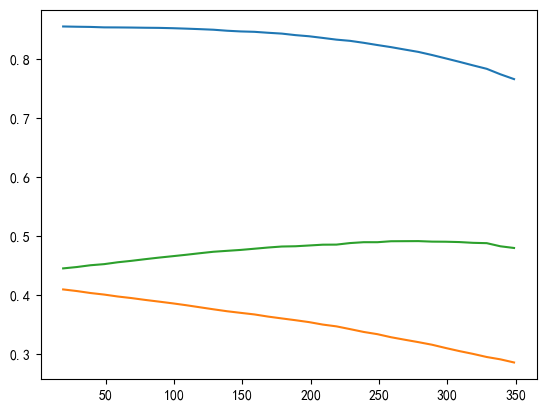

In [15]:
import seaborn 
seaborn.lineplot(x=z_threshold, y=pod)
seaborn.lineplot(x=z_threshold, y=far)
seaborn.lineplot(x=z_threshold, y=np.array(pod)-np.array(far))